<a href="https://colab.research.google.com/github/dancher00/Experimental-Data-Analysis/blob/main/7_tracking_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7
## Development of a tracking filter of a moving object when measurements and motion models are in different coordinate systems.


**Team 1:**

- **Danil Belov**

- **Alexey Kotcov**

- **Roman Khalikov**



During this assignment we all worked as team together on the code part, but the **most valuable part** was made by **Danil Belov**. When we was in the stage of depression he found the way to solve all the bugs.


 ***Through the thorns to the stars!***

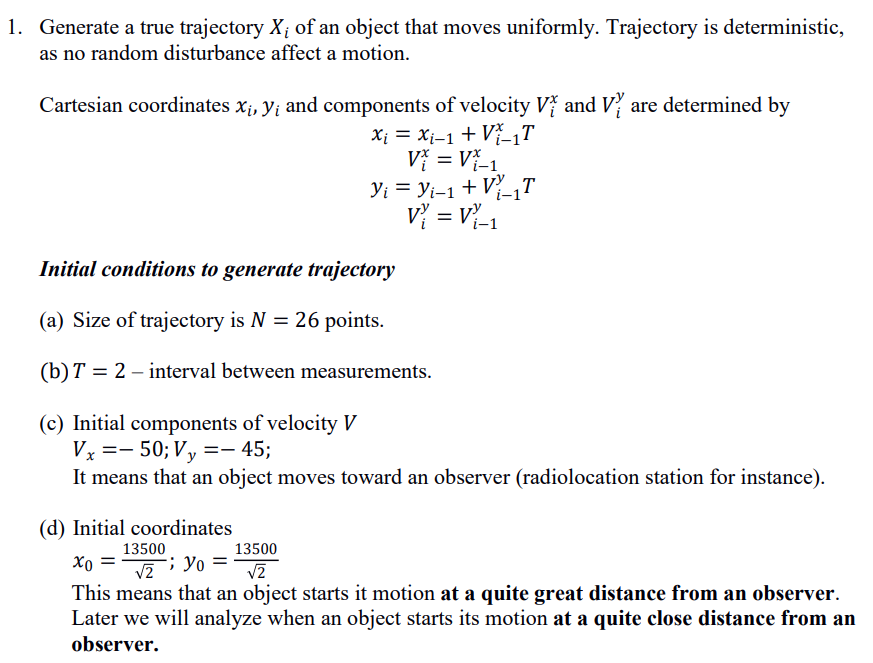

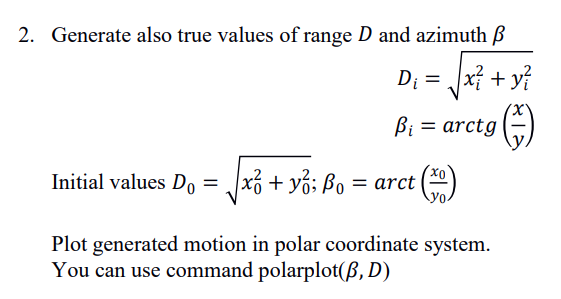

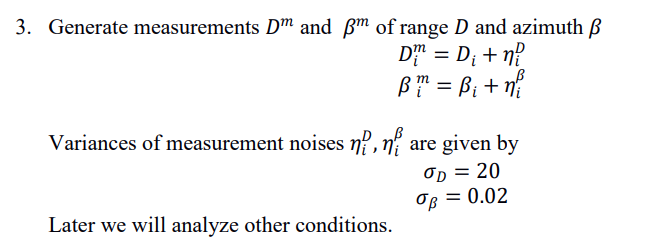

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [ ]:
# 1-3, 5, 9
def generate_trajectory(N, x_0, v_x_0, y_0, v_y_0, sigma_D, sigma_b):
    x = np.zeros((N, 1))
    y = np.zeros((N, 1))

    v_x = np.zeros((N, 1))
    v_y = np.zeros((N, 1))

    D = np.zeros((N, 1))
    beta = np.zeros((N, 1))

    x[0] = x_0
    y[0] = y_0

    v_x += v_x_0
    v_y += v_y_0

    D[0] = np.sqrt(x[0]**2 + y[0]**2)
    beta[0] = np.arctan2(x[0], y[0])

    for i in range(1, N):
        x[i] = x[i-1] + v_x[i-1] * T
        y[i] = y[i-1] + v_y[i-1] * T
        D[i] = np.sqrt(x[i]**2 + y[i]**2)
        beta[i] = np.arctan2(x[i], y[i])

    X_c = np.stack([x,v_x,y,v_y], axis = 1)
    X_p =  np.stack([beta,D], axis = 1)

    D_m = D +  np.random.normal(0, np.sqrt(sigma_D), D.shape)
    beta_m = beta + np.random.normal(0, np.sqrt(sigma_b), beta.shape)

    x_m = D_m * np.sin(beta_m)
    y_m = D_m * np.cos(beta_m)

    z_c = np.stack([x_m, y_m], axis = 1)
    z_p = np.stack([beta_m, D_m], axis = 1)

    R = np.zeros((N,2,2))

    for i in range(N):
        R[i,0,0] = np.sin(beta_m[i])**2 * sigma_D + (D_m[i])**2 * np.cos(beta_m[i])**2 * sigma_b
        R[i,0,1] = np.sin(beta_m[i]) * np.cos(beta_m[i]) * (sigma_D - D_m[i]**2 * sigma_b)
        R[i,1,0] = np.sin(beta_m[i]) * np.cos(beta_m[i]) * (sigma_D - D_m[i]**2 * sigma_b)
        R[i,1,1] = np.cos(beta_m[i])**2 * sigma_D + (D_m[i])**2 * np.sin(beta_m[i])**2 * sigma_b
    return X_c, X_p, z_c, z_p, R


In [ ]:
x_0 = 13500/ np.sqrt(2)
y_0 = 13500/ np.sqrt(2)

v_x_0 = -50
v_y_0 = -45

T = 2
N = 26

sigma_D = 20 ** 2
sigma_b = 0.02 ** 2

In [ ]:
X_c, X_p, z_c, z_p, R = generate_trajectory(N, x_0, v_x_0, y_0, v_y_0, sigma_D, sigma_b)

In [ ]:
x = X_c[:, 0]
v_x = X_c[:, 1]

y = X_c[:, 2]
v_x = X_c[:, 3]

x_m = z_c[:, 0]
y_m = z_c[:, 1]

In [ ]:
beta = X_p[:, 0]
D = X_p[:, 1]

beta_m = z_p[:, 0]
D_m = z_p[:, 1]

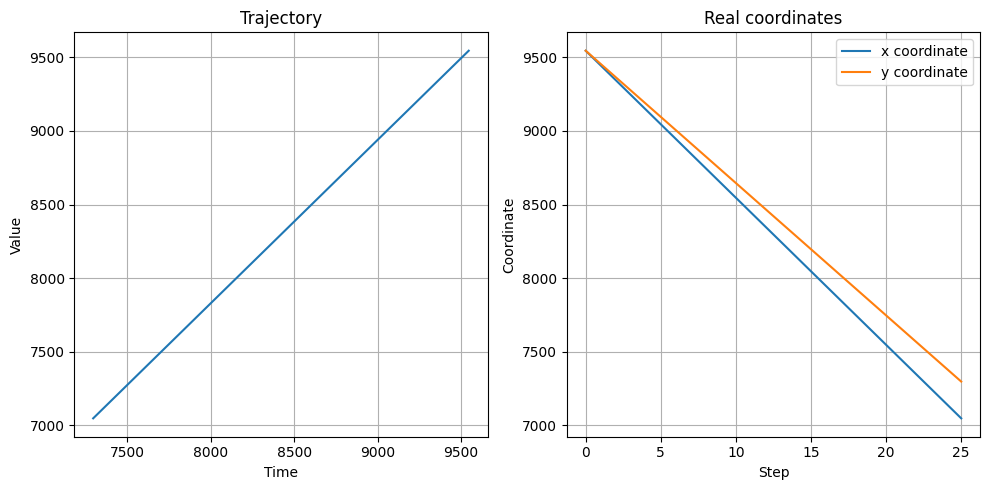

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.plot(y,x)
ax1.set_title('Trajectory')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.grid()

ax2.plot(x, label='x coordinate')
ax2.plot(y, label='y coordinate')
ax2.set_title('Real coordinates')
ax2.set_xlabel('Step')
ax2.set_ylabel('Coordinate')
ax2.grid()
ax2.legend()

fig.tight_layout()
plt.show()

Plots in Cartesian coordinates tell us almost nothing. Let me take you to the polar

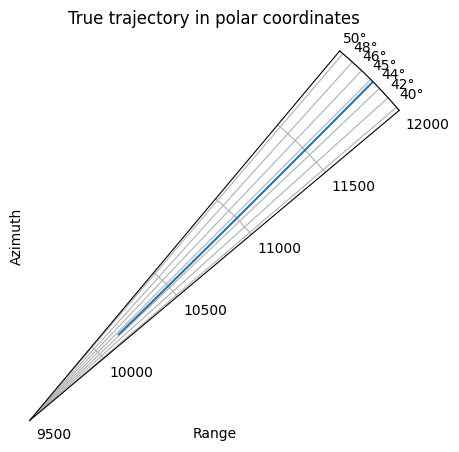

In [ ]:
plt.polar(beta,D)
plt.ylim([9500,12000])
plt.xlim([np.pi/9 * 2,np.pi/18 * 5])
plt.grid()
plt.title('True trajectory in polar coordinates')
plt.xlabel('Range')
plt.ylabel('Azimuth')
plt.grid()
plt.show()

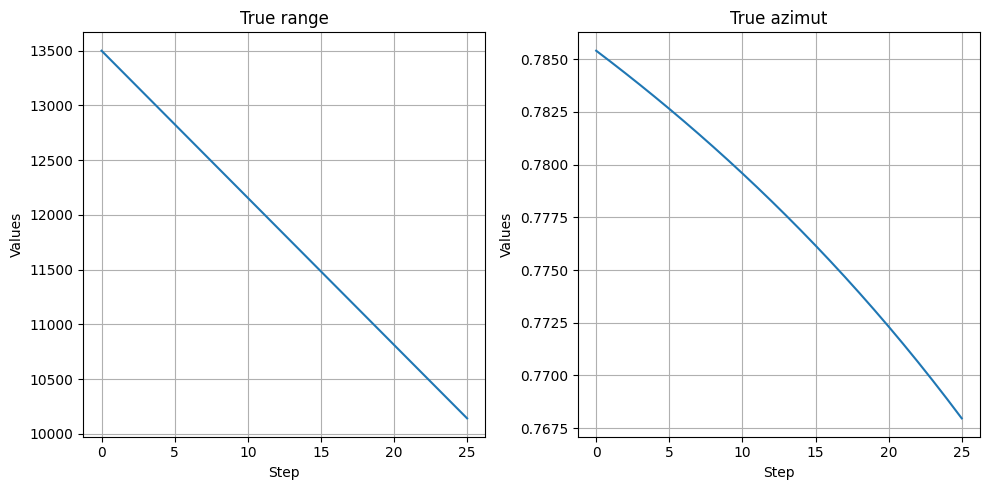

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))

ax1.plot(D)
ax1.set_title('True range')
ax1.set_xlabel('Step')
ax1.set_ylabel('Values')
ax1.grid()


ax2.plot(beta)
ax2.set_title('True azimut')
ax2.set_xlabel('Step')
ax2.set_ylabel('Values')
ax2.grid()


fig.tight_layout()
plt.show()

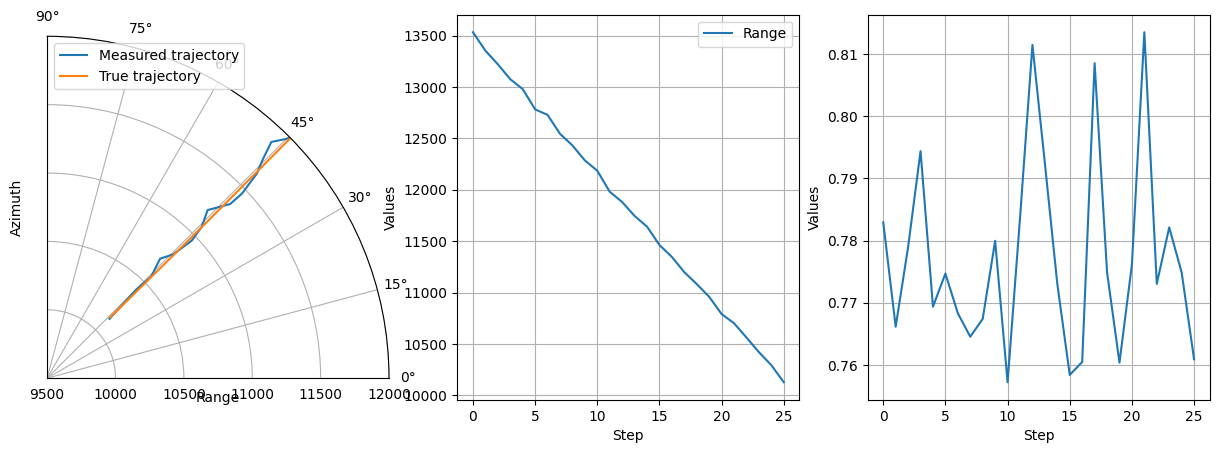

In [ ]:
plt.figure(figsize= (15,5))
plt.subplot(131,projection = 'polar')
plt.polar(beta_m, D_m,label = 'Measured trajectory')
plt.polar(beta,D,label = 'True trajectory')
plt.ylim([9500,12000])
plt.xlim([0,np.pi/2])
plt.grid()
plt.xlabel('Range')
plt.ylabel('Azimuth')
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(D_m, label = 'Range')
plt.xlabel('Step')
plt.ylabel('Values')
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(beta_m, label = 'Azimuth')
plt.xlabel('Step')
plt.ylabel('Values')
plt.grid()


plt.show()

After development of trajectory generation funciton we now can produce true trajectory in polar coordinates and measurements generated with **sigma = 0.02^2**, which is quite small value, lokking at the polar plot we see just **small deviations** from the real values.

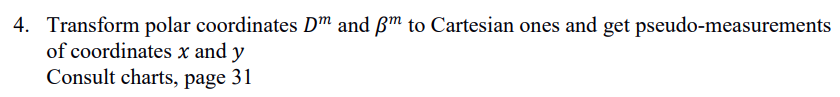

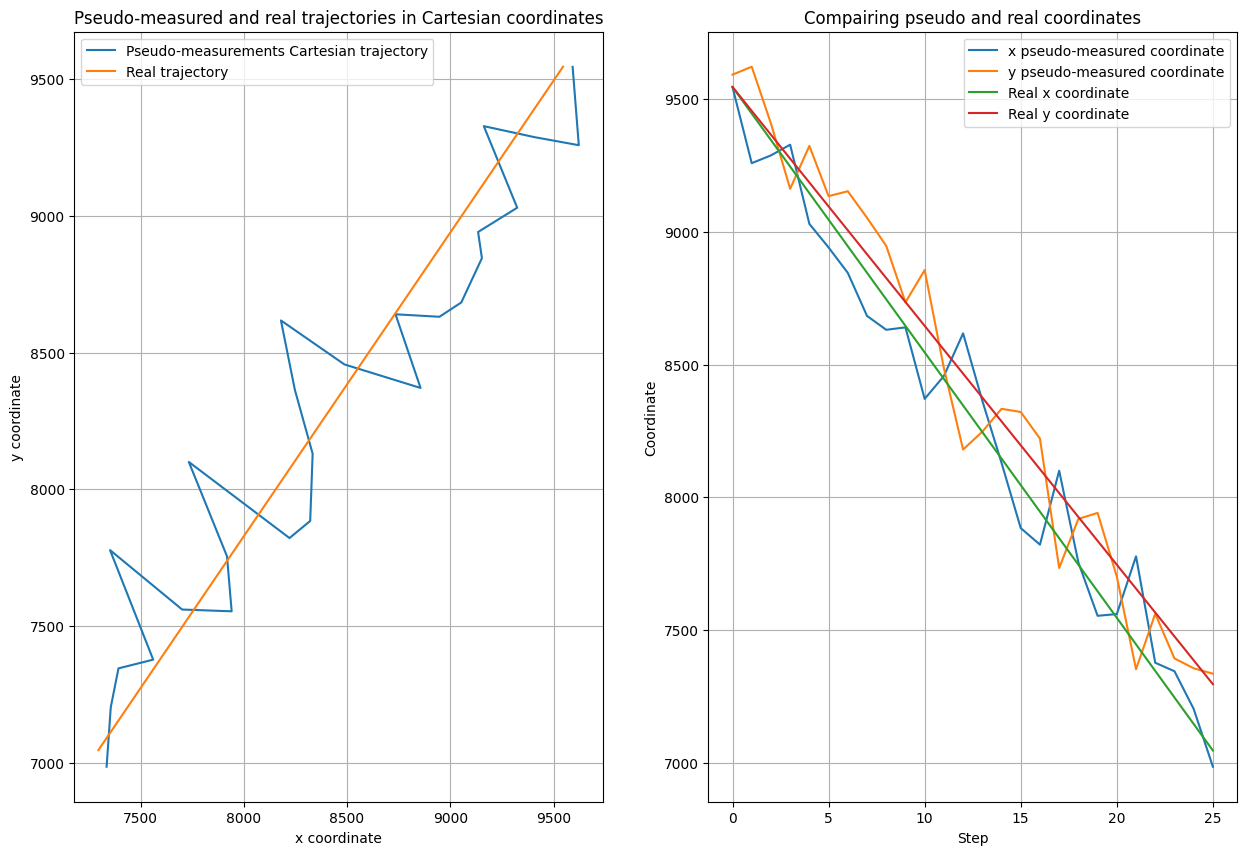

In [ ]:
plt.figure(figsize= (15,10))
plt.subplot(121)
plt.plot(y_m, x_m, label = 'Pseudo-measurements Cartesian trajectory')
plt.plot(y,x, label = 'Real trajectory')
plt.title('Pseudo-measured and real trajectories in Cartesian coordinates')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(x_m, label = 'x pseudo-measured coordinate')
plt.plot(y_m, label = 'y pseudo-measured coordinate')
plt.plot(x, label = 'Real x coordinate')
plt.plot(y, label = 'Real y coordinate')
plt.title('Compairing pseudo and real coordinates')
plt.xlabel('Step')
plt.ylabel('Coordinate')
plt.grid()
plt.legend()

plt.show()

Now we see very noisy pseudo-measured trajectory. From this one we already can hardly reconstruct the true one by the vision.

**For sure it needs to be filtered.**

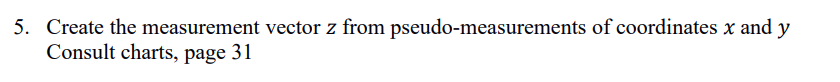

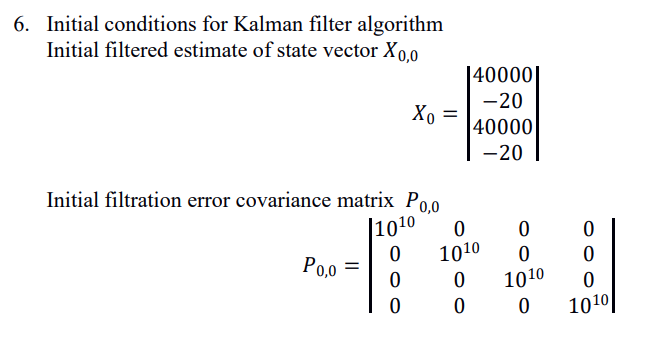

In [ ]:
X_0 = np.array([[40000],[-20],[40000],[-20]])
P_00 = np.eye(4) * 10**10

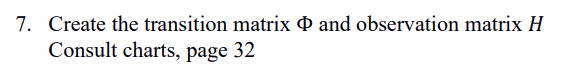

In [ ]:
F = np.eye(4)
F[0,1] = T
F[2,3] = T

H = np.array([[1,0,0,0],[0,0,1,0]])

Q = np.zeros((4,1))

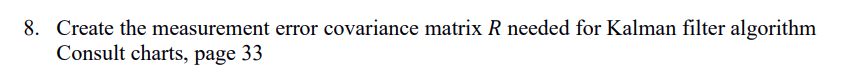

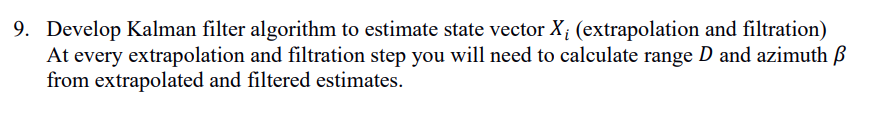

In [ ]:
from numpy.linalg import pinv

def kalman(X, F, Q, H, X_0, P_00, z, R):
    X_pred = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
    X_pred[0] = X_0

    X_filtered = np.zeros((X.shape))
    X_filtered[0] = X_0

    P_pred = np.zeros((X.shape[0]+1, X.shape[1], X.shape[1]))
    P_pred[0] = P_00

    P_filtered = np.zeros((X.shape[0],X.shape[1], X.shape[1]))
    P_filtered[0] = P_00

    K = np.zeros((X.shape[0], H.transpose().shape[0], H.transpose().shape[1]))
    Q = Q @ Q.transpose()

    for i in range(1, X.shape[0]):
        X_pred[i] = F @ X_filtered[i-1]
        P_pred[i] = F @ P_filtered[i-1] @ F.transpose() + Q
        K[i] = P_pred[i] @ H.transpose() @ np.linalg.inv(H @ P_pred[i] @ H.transpose() + R[i])
        X_filtered[i] = X_pred[i] + K[i] @ (z[i] - H @ X_pred[i])
        P_filtered[i] = (np.eye((K[i] @ H).shape[0])- K[i] @ H) @ P_pred[i]

    beta_extrap = np.arctan2(X_pred[:,0,:], X_pred[:,2,:])
    beta_filtered = np.arctan2(X_filtered[:,0,:], X_filtered[:,2,:])

    D_extrap = np.sqrt(X_pred[:,0,:]**2 + X_pred[:,2,:]**2)
    D_filtered = np.sqrt(X_filtered[:,0,:]**2 + X_filtered[:,2,:]**2)

    return X_pred, P_pred, X_filtered, P_filtered, D_extrap, D_filtered, beta_extrap, beta_filtered, K

In [ ]:
X_pred, P_pred, X_filtered, P_filtered, D_extrap,D_filtered, beta_extrap, beta_filtered, _ = kalman(X_c, F, Q, H, X_0, P_00, z_c, R)

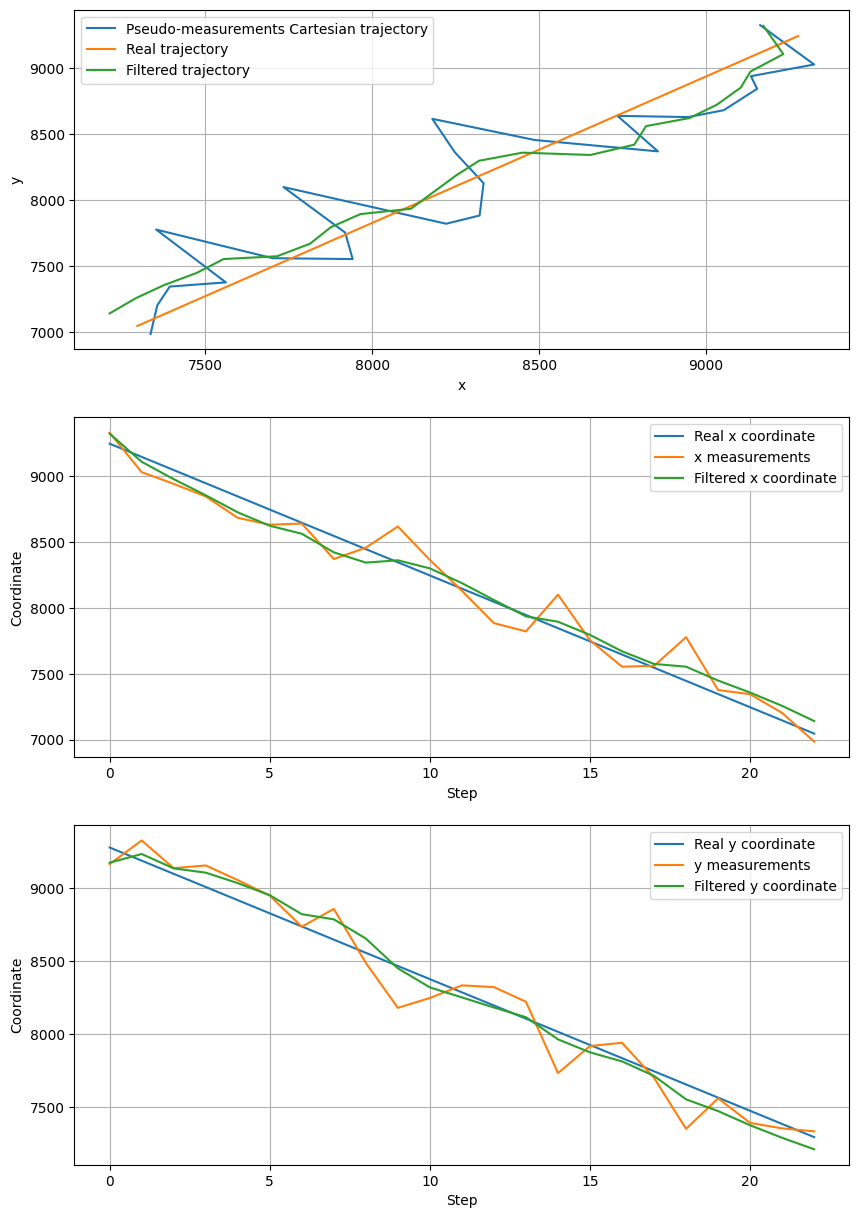

In [ ]:
fig = plt.figure(figsize=(10, 15))
plt.subplot(311)
plt.plot(y_m[3:], x_m[3:], label = 'Pseudo-measurements Cartesian trajectory')
plt.plot(y[3:], x[3:], label = 'Real trajectory')
plt.plot(X_filtered[3:, 2, :], X_filtered[3:, 0, :], label = 'Filtered trajectory')

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

plt.subplot(312)
plt.plot(X_c[3:, 0, :], label = 'Real x coordinate')
plt.plot(z_c[3:, 0, :], label = 'x measurements')
plt.plot(X_filtered[3:, 0, :], label = 'Filtered x coordinate')
plt.grid()
plt.xlabel('Step')
plt.ylabel('Coordinate')
plt.legend()

plt.subplot(313)
plt.plot(X_c[3:, 2, :], label = 'Real y coordinate')
plt.plot(z_c[3:, 1, :], label = 'y measurements')
plt.plot(X_filtered[3:, 2, :], label = 'Filtered y coordinate')
plt.grid()
plt.xlabel('Step')
plt.ylabel('Coordinate')
plt.legend()
plt.show()

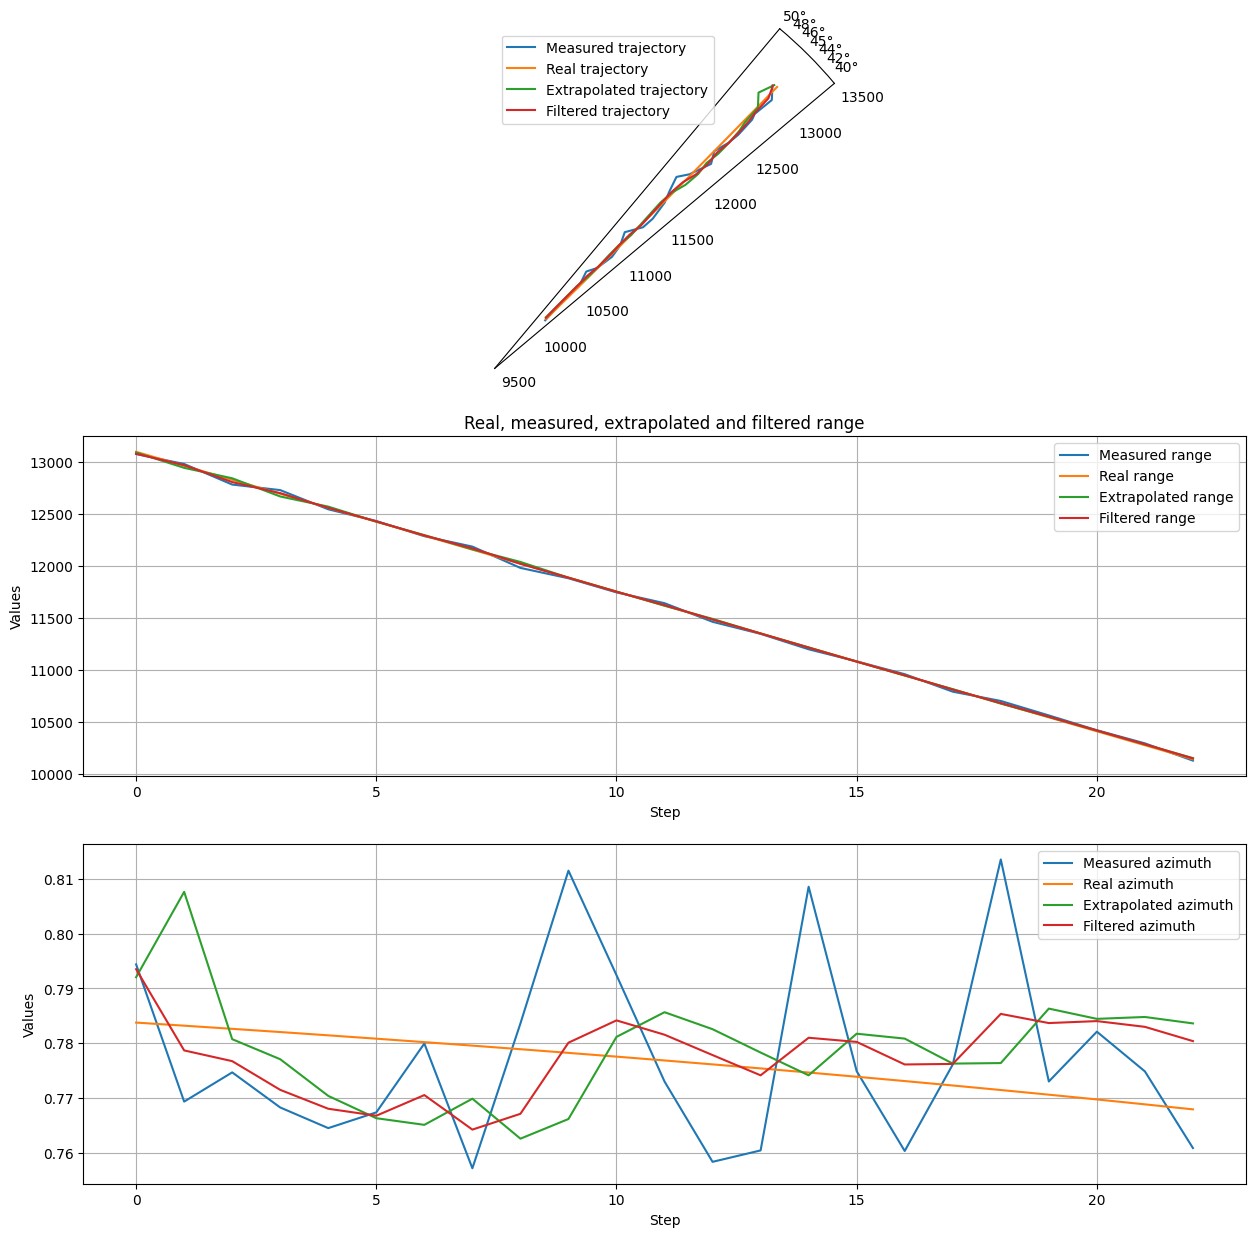

In [ ]:
fig = plt.figure(figsize=(15,15))
plt.subplot(311,projection = 'polar')
plt.polar(beta_m[3:], D_m[3:], label = 'Measured trajectory')
plt.polar(beta[3:], D[3:], label = 'Real trajectory')
plt.polar(beta_extrap[3:], D_extrap[3:], label = 'Extrapolated trajectory')
plt.polar(beta_filtered[3:], D_filtered[3:], label = 'Filtered trajectory')
plt.grid()
plt.xlim([np.pi/9*2, np.pi/18*5])
plt.ylim([9500, 13500])
plt.legend()


plt.subplot(312)
plt.plot(D_m[3:], label = 'Measured range')
plt.plot(D[3:], label = 'Real range')
plt.plot(D_extrap[3:], label = 'Extrapolated range')
plt.plot(D_filtered[3:], label = 'Filtered range')
plt.title('Real, measured, extrapolated and filtered range')
plt.xlabel('Step')
plt.ylabel('Values')
plt.grid()
plt.legend()

plt.subplot(313)
plt.plot(beta_m[3:], label = 'Measured azimuth')
plt.plot(beta[3:], label = 'Real azimuth')
plt.plot(beta_extrap[3:], label = 'Extrapolated azimuth')
plt.plot(beta_filtered[3:], label = 'Filtered azimuth')
plt.xlabel('Step')
plt.ylabel('Values')
plt.grid()
plt.legend()
plt.show()


On the plots you can see that the azimuth jumps while the Range almost coincided with the real one

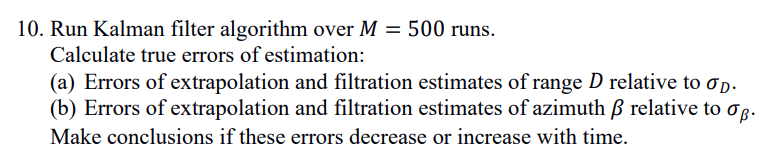

In [ ]:
M = 500

error_D_ext =  np.zeros((M, N, 1))
error_D_fil =  np.zeros((M, N, 1))

error_b_ext =  np.zeros((M, N, 1))
error_b_fil =  np.zeros((M, N, 1))

for i in range(M):
    X_c, X_p, z_c, z_p, R = generate_trajectory(N, x_0, v_x_0, y_0, v_y_0, sigma_D, sigma_b)
    X_pred, P_pred, X_fil, P_fil, D_ext, D_fil, beta_ext, beta_fil, _ = kalman(X_c, F, Q, H, X_0, P_00, z_c, R)



    error_D_ext[i] = (D_ext - X_p[:, 1])**2
    error_D_fil[i] = (D_fil - X_p[:, 1])**2

    error_b_ext[i] = (beta_ext - X_p[:, 0])**2
    error_b_fil[i] = (beta_fil - X_p[:, 0])**2

error_D_ext_f = np.sqrt(np.sum(error_D_ext, axis=0)/(M-1))
error_D_fil_f = np.sqrt(np.sum(error_D_fil, axis=0)/(M-1))

error_b_ext_f = np.sqrt(np.sum(error_b_ext, axis=0)/(M-1))
error_b_fil_f = np.sqrt(np.sum(error_b_fil, axis=0)/(M-1))

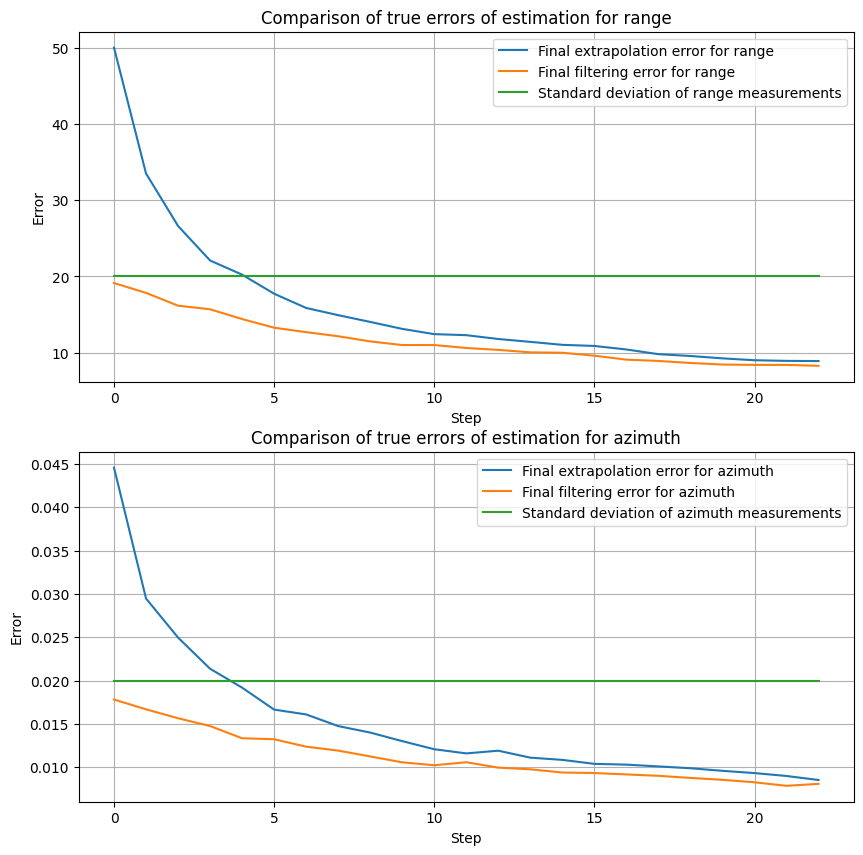

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Comparison of true errors of estimation for range')
plt.grid()
plt.plot(error_D_ext_f[3:],label = 'Final extrapolation error for range')
plt.plot(error_D_fil_f[3:],label = 'Final filtering error for range')
plt.plot(np.zeros(23) + np.sqrt(sigma_D),label = 'Standard deviation of range measurements')
plt.xlabel('Step')
plt.ylabel('Error')
plt.legend()

plt.subplot(212)
plt.title('Comparison of true errors of estimation for azimuth')
plt.grid()
plt.plot(error_b_ext_f[3:],label = 'Final extrapolation error for azimuth')
plt.plot(error_b_fil_f[3:],label = 'Final filtering error for azimuth')
plt.plot(np.zeros(23) + np.sqrt(sigma_b), label = 'Standard deviation of azimuth measurements')
plt.xlabel('Step')
plt.ylabel('Error')
plt.legend()

plt.show()

After running 500 times: As can be seen from
the graphs, the values of errors in both azimuth and range decrease over time and become lower than the sigma of the measured noise, therefore, the filter works well.

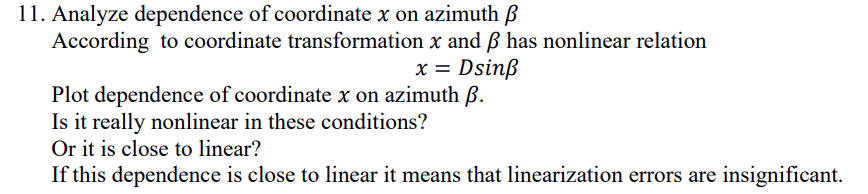

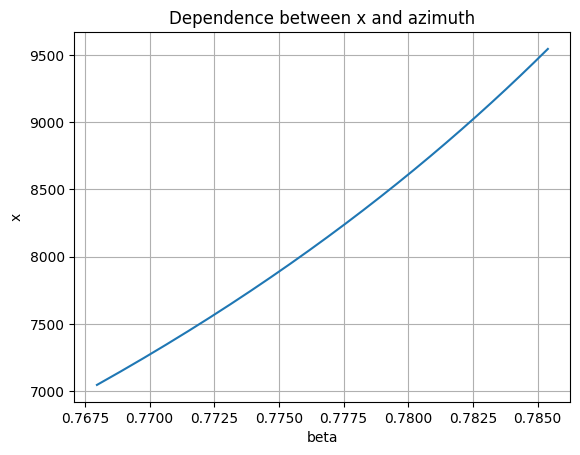

In [ ]:
plt.title('Dependence between x and azimuth')
plt.plot(beta, x)
plt.grid()
plt.xlabel('beta')
plt.ylabel('x')
plt.show()


On the plot we can see dependence between coordinate x and azimyth beta, and looking at the trajectory we can conclude that it is **almost linear** that means that **linerization error are insignificant.**

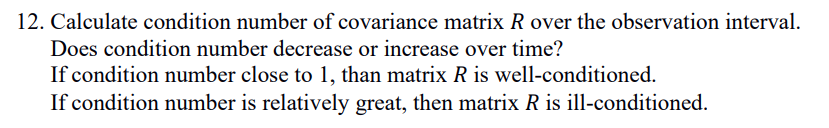

In [ ]:
condition_number = np.zeros((N, 1))
for i in range(N):
    condition_number[i] = np.linalg.cond(R[i])

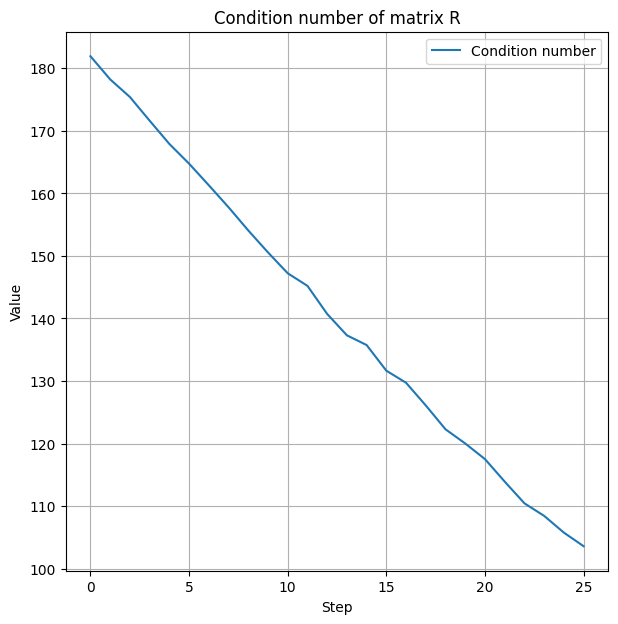

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.title('Condition number of matrix R')
plt.plot(condition_number,label = 'Condition number')
plt.grid()
plt.legend()
plt.xlabel('Step')
plt.ylabel('Value')
plt.show()


Condition number R is decreasing during the step sequence. And we have point where R=1, when value equals ~180 => at this point R matrix is **well-conditioned**. And accordingly we can say that we have values where our covariance matrix can be named **ill-conditioned.**

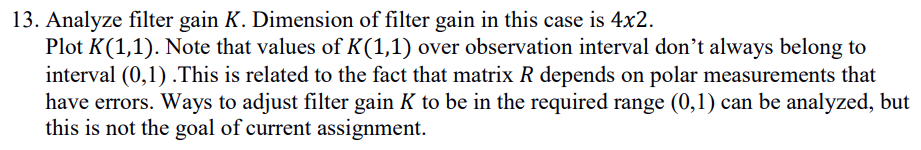

In [ ]:
_, _, _, _, _, _, _, _, K = kalman(X_c, F, Q, H, X_0, P_00, z_c, R)

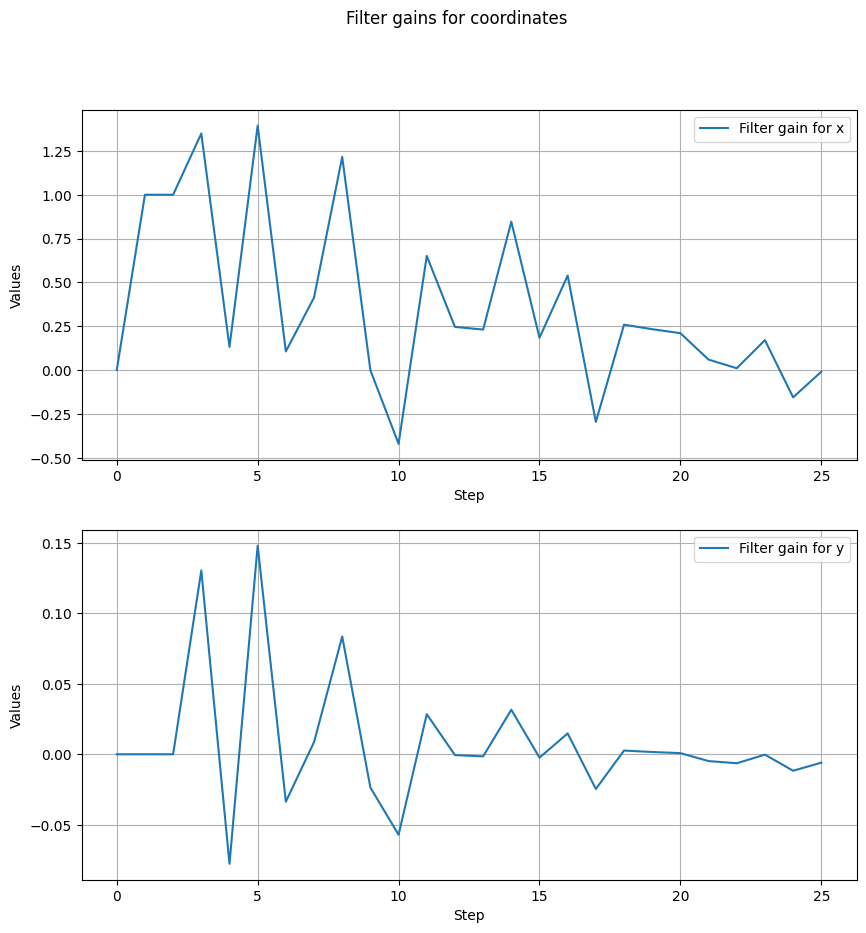

In [ ]:
plt.figure(figsize = (10,10))
plt.suptitle('Filter gains for coordinates')
plt.subplot(211)
plt.plot(K[:,0,0],label = 'Filter gain for x')
plt.grid()
plt.xlabel('Step')
plt.ylabel('Values')
plt.legend()
plt.subplot(212)
plt.plot(K[:,1,1],label = 'Filter gain for y')
plt.grid()
plt.xlabel('Step')
plt.ylabel('Values')
plt.legend()
plt.show()

Analyzing the dynamics of filter gain K, we can see that its value lays in range ~(-0.2, 1.35) for x-coordinates and ~(-0.17,.07) for y-coordinates.

As it was stated **due to polar measurements error** we have values more than 1.

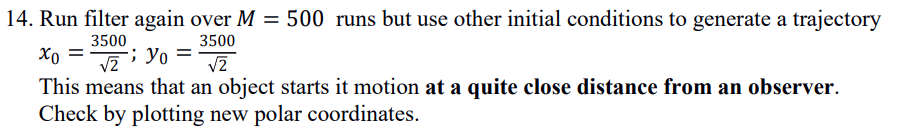

In [ ]:
x_0 = 3500 / np.sqrt(2)
y_0 = 3500 / np.sqrt(2)

X_c, X_p, z_c, z_p, R = generate_trajectory(N, x_0, v_x_0, y_0, v_y_0, sigma_D, sigma_b)

X_pred, P_pred, X_fil, P_fil, D_ext, D_fil, beta_ext, beta_fil, _ = kalman(X_c, F, Q, H, X_0, P_00, z_c, R)

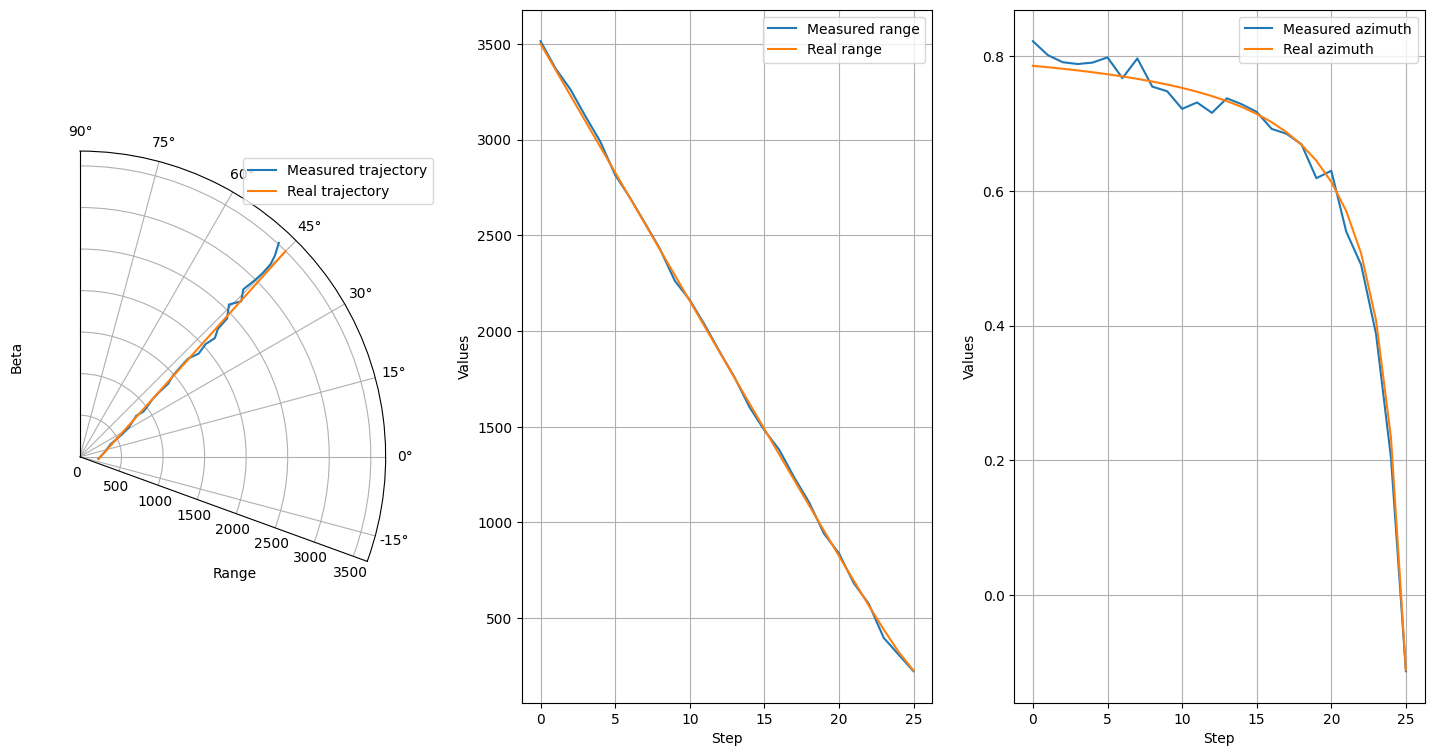

In [ ]:
plt.figure(figsize=(18,9))
plt.subplot(131,projection = 'polar')
plt.polar(z_p[:,0,:], z_p[:,1,:], label = 'Measured trajectory')
plt.polar(X_p[:,0,:],X_p[:,1,:],label = 'Real trajectory')
plt.grid()
plt.xlabel('Range')
plt.ylabel('Beta')
plt.grid()
plt.xlim([-np.pi/9,np.pi/2])
plt.legend()

plt.subplot(132)
plt.plot(z_p[:,1,:],label = 'Measured range')
plt.plot(X_p[:,1,:],label = 'Real range')
plt.xlabel('Step')
plt.ylabel('Values')
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(z_p[:,0,:],label = 'Measured azimuth')
plt.plot(X_p[:,0,:], label = 'Real azimuth')
plt.xlabel('Step')
plt.ylabel('Values')
plt.grid()
plt.legend()
plt.show()

Looking at the plot we can see how parameters affected the resulting plot in polar coordinates, we can see that starting point is very close to observer.

In [ ]:
M = 500

error_D_ext =  np.zeros((M, N, 1))
error_D_fil =  np.zeros((M, N, 1))

error_b_ext =  np.zeros((M, N, 1))
error_b_fil =  np.zeros((M, N, 1))

for i in range(M):
    X_c, X_p, z_c, z_p, R = generate_trajectory(N, x_0, v_x_0, y_0, v_y_0, sigma_D, sigma_b)
    X_pred, P_pred, X_fil, P_fil, D_ext, D_fil, beta_ext, beta_fil, _ = kalman(X_c, F, Q, H, X_0, P_00, z_c, R)



    error_D_ext[i] = (D_ext - X_p[:, 1])**2
    error_D_fil[i] = (D_fil - X_p[:, 1])**2

    error_b_ext[i] = (beta_ext - X_p[:, 0])**2
    error_b_fil[i] = (beta_fil - X_p[:, 0])**2

error_D_ext_f = np.sqrt(np.sum(error_D_ext, axis=0)/(M-1))
error_D_fil_f = np.sqrt(np.sum(error_D_fil, axis=0)/(M-1))

error_b_ext_f = np.sqrt(np.sum(error_b_ext, axis=0)/(M-1))
error_b_fil_f = np.sqrt(np.sum(error_b_fil, axis=0)/(M-1))

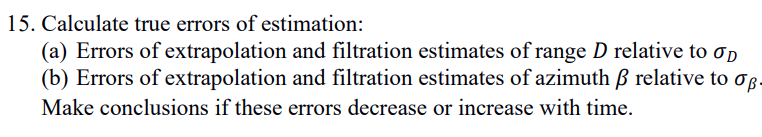

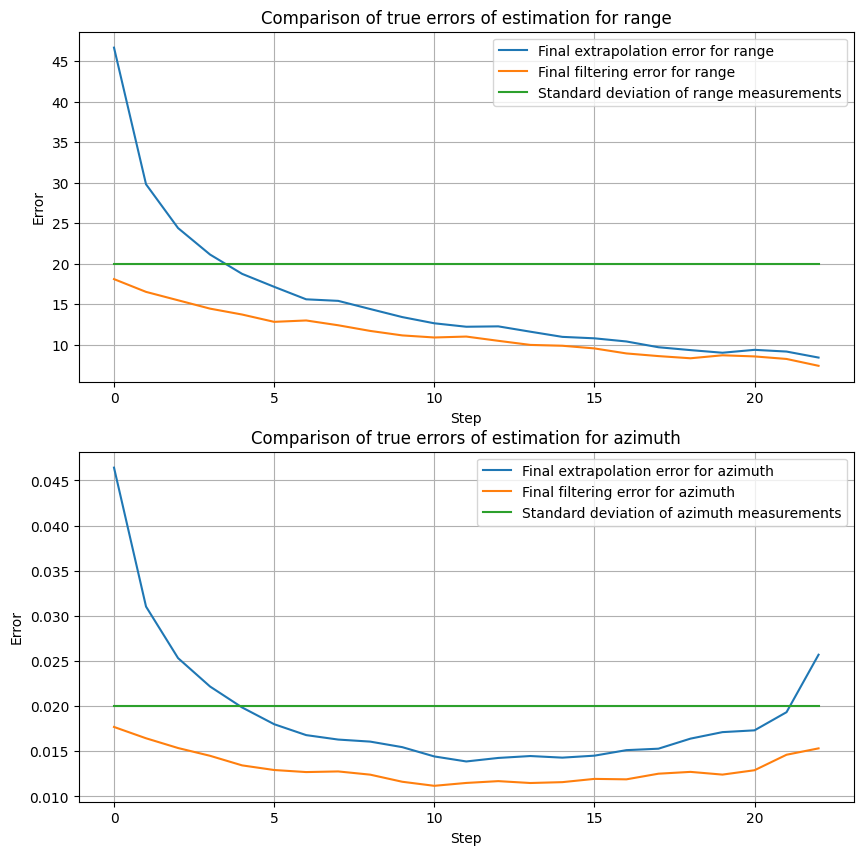

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Comparison of true errors of estimation for range')
plt.grid()
plt.plot(error_D_ext_f[3:],label = 'Final extrapolation error for range')
plt.plot(error_D_fil_f[3:],label = 'Final filtering error for range')
plt.plot(np.zeros(23) + np.sqrt(sigma_D),label = 'Standard deviation of range measurements')
plt.xlabel('Step')
plt.ylabel('Error')
plt.legend()

plt.subplot(212)
plt.title('Comparison of true errors of estimation for azimuth')
plt.grid()
plt.plot(error_b_ext_f[3:],label = 'Final extrapolation error for azimuth')
plt.plot(error_b_fil_f[3:],label = 'Final filtering error for azimuth')
plt.plot(np.zeros(23) + np.sqrt(sigma_b),label = 'Standard deviation of azimuth measurements')
plt.xlabel('Step')
plt.ylabel('Error')
plt.legend()

plt.show()


Looking at result plots we can say two things. **Case 1 for range D**: we can see that error decreasing during steps and slows down near ~10. But in **Case 2 for azimuth beta** we see interesting thing: at the end we see **increasing** of error for a while.

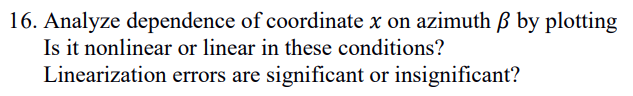

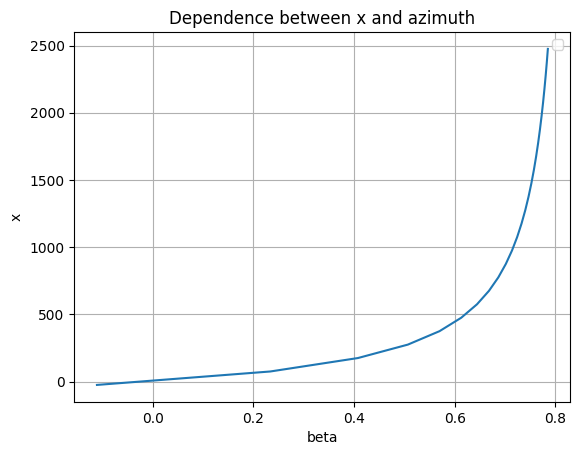

In [ ]:
fig = plt.figure()
plt.title('Dependence between x and azimuth')
plt.plot(X_p[:,0,:], X_c[:,0,:])
plt.grid()
plt.legend()
plt.xlabel('beta')
plt.ylabel('x')
plt.show()

We can say that it is definately nonlinear dependence => **linearization error is significant.**

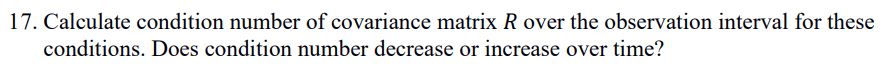

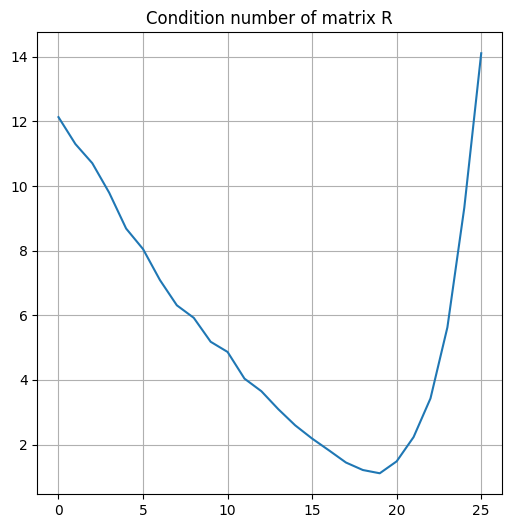

In [ ]:
condition_number_17 = np.zeros((N, 1))
for i in range(N):
    condition_number_17[i] = np.linalg.cond(R[i])

fig = plt.figure(figsize=(6,6))
plt.title('Condition number of matrix R')
plt.plot(condition_number_17,label = 'Condition number')
plt.grid()

Just as it was with the plot of azimuth beta error, we see **stable decreasing** and on some point **rapid increase at the end** of the values.

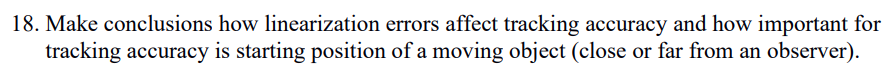

As we understood linearization errors lead to unstable condition number but at the same time starting from close to observer point leads to fast optimal condition finding. Starting point for first experiment was ~180 and now it is just 12.5.

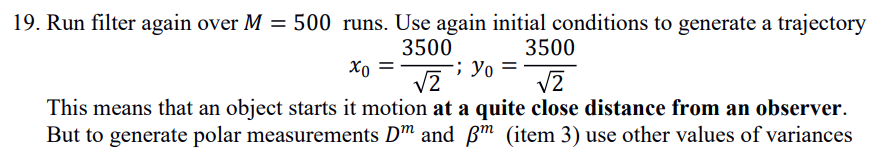

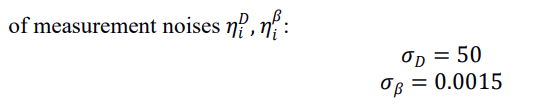

In [ ]:
sigma_D = 50**2
sigma_b = 0.0015**2

In [ ]:
X_c, X_p, z_c, z_p, R = generate_trajectory(N, x_0, v_x_0, y_0, v_y_0, sigma_D, sigma_b)
X_pred, P_pred, X_fil, P_fil, D_ext, D_fil, beta_ext, beta_fil, _ = kalman(X_c, F, Q, H, X_0, P_00, z_c, R)

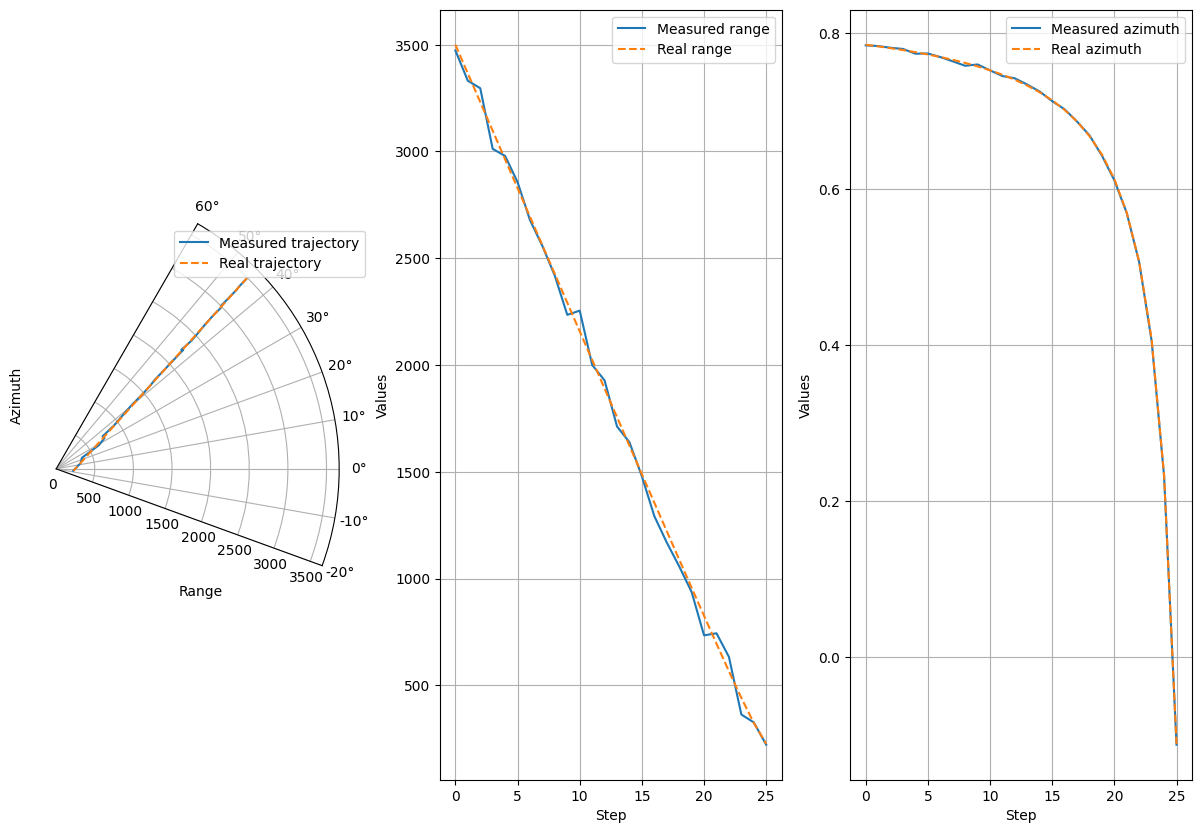

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(131,projection = 'polar')
plt.polar(z_p[:,0,:], z_p[:,1,:], label = 'Measured trajectory')
plt.polar(X_p[:,0,:],X_p[:,1,:],label = 'Real trajectory', linestyle = '--')
plt.grid()
plt.xlabel('Range')
plt.ylabel('Azimuth')
plt.grid()
plt.xlim([-np.pi/9, np.pi/3])
plt.legend()
plt.subplot(132)
plt.plot(z_p[:,1,:],label = 'Measured range')
plt.plot(X_p[:,1,:],label = 'Real range', linestyle = '--')
plt.xlabel('Step')
plt.ylabel('Values')
plt.grid()
plt.legend()
plt.subplot(133)
plt.plot(z_p[:,0,:],label = 'Measured azimuth')
plt.plot(X_p[:,0,:], label = 'Real azimuth', linestyle = '--')
plt.xlabel('Step')
plt.ylabel('Values')
plt.grid()
plt.legend()
plt.show()

On these plots, there is practically no difference between the measured azimuth and the true one. This is obviosly due to sigma_b is toooo small now.

But I also don't notice a significant difference between Ranges, despite of the very big value of sigma_D

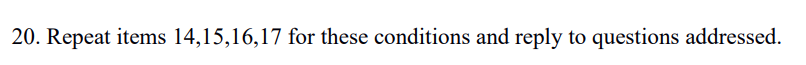

In [ ]:
M = 500

error_D_ext =  np.zeros((M, N, 1))
error_D_fil =  np.zeros((M, N, 1))

error_b_ext =  np.zeros((M, N, 1))
error_b_fil =  np.zeros((M, N, 1))

for i in range(M):
    X_c, X_p, z_c, z_p, R = generate_trajectory(N, x_0, v_x_0, y_0, v_y_0, sigma_D, sigma_b)
    X_pred, P_pred, X_fil, P_fil, D_ext, D_fil, beta_ext, beta_fil, _ = kalman(X_c, F, Q, H, X_0, P_00, z_c, R)



    error_D_ext[i] = (D_ext - X_p[:, 1])**2
    error_D_fil[i] = (D_fil - X_p[:, 1])**2

    error_b_ext[i] = (beta_ext - X_p[:, 0])**2
    error_b_fil[i] = (beta_fil - X_p[:, 0])**2

error_D_ext_f = np.sqrt(np.sum(error_D_ext, axis=0)/(M-1))
error_D_fil_f = np.sqrt(np.sum(error_D_fil, axis=0)/(M-1))

error_b_ext_f = np.sqrt(np.sum(error_b_ext, axis=0)/(M-1))
error_b_fil_f = np.sqrt(np.sum(error_b_fil, axis=0)/(M-1))

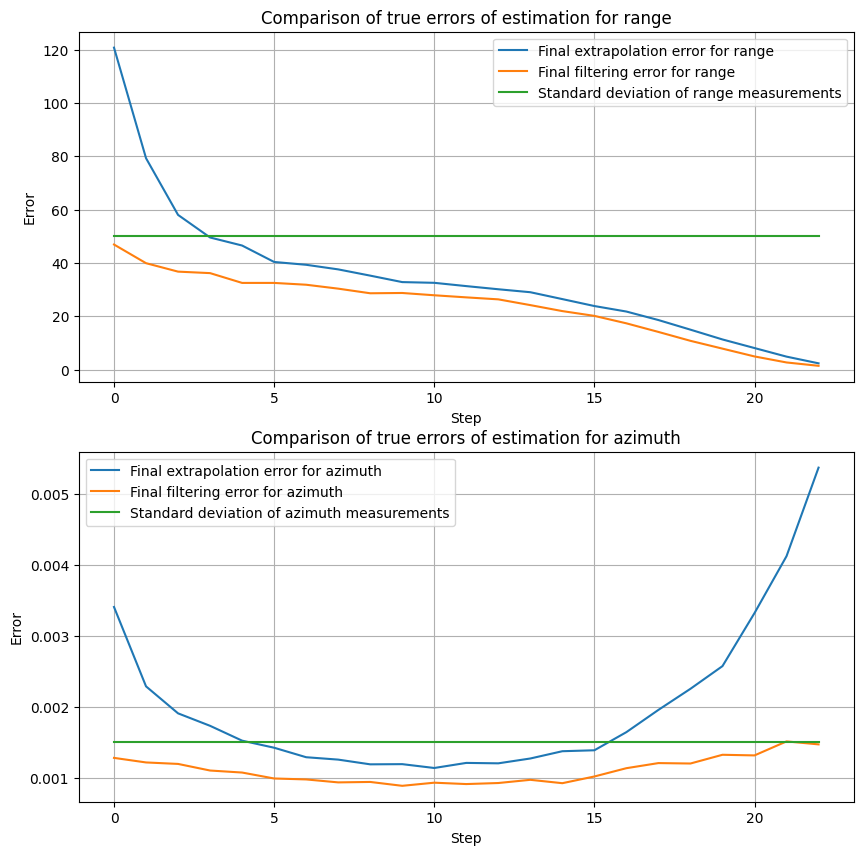

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Comparison of true errors of estimation for range')
plt.grid()
plt.plot(error_D_ext_f[3:],label = 'Final extrapolation error for range')
plt.plot(error_D_fil_f[3:],label = 'Final filtering error for range')
plt.plot(np.zeros(23) + np.sqrt(sigma_D),label = 'Standard deviation of range measurements')
plt.xlabel('Step')
plt.ylabel('Error')
plt.legend()

plt.subplot(212)
plt.title('Comparison of true errors of estimation for azimuth')
plt.grid()
plt.plot(error_b_ext_f[3:],label = 'Final extrapolation error for azimuth')
plt.plot(error_b_fil_f[3:],label = 'Final filtering error for azimuth')
plt.plot(np.zeros(23) + np.sqrt(sigma_b),label = 'Standard deviation of azimuth measurements')
plt.xlabel('Step')
plt.ylabel('Error')
plt.legend()
plt.show()


Wow! first the error of azimuths decreases, and then it increases. At first I thought there was something wrong with the code. But it's becouse object passes the observer, I think.


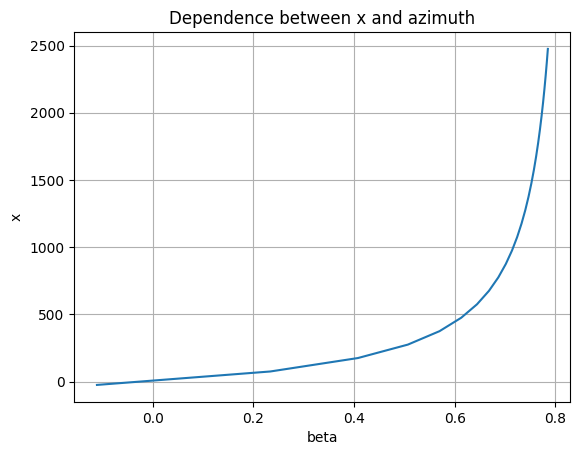

In [ ]:
fig = plt.figure()
plt.title('Dependence between x and azimuth')
plt.plot(X_p[:,0,:], X_c[:,0,:])
plt.xlabel('beta')
plt.ylabel('x')
plt.grid()
plt.show()

Dependence between azimuth and x is the same like previos task


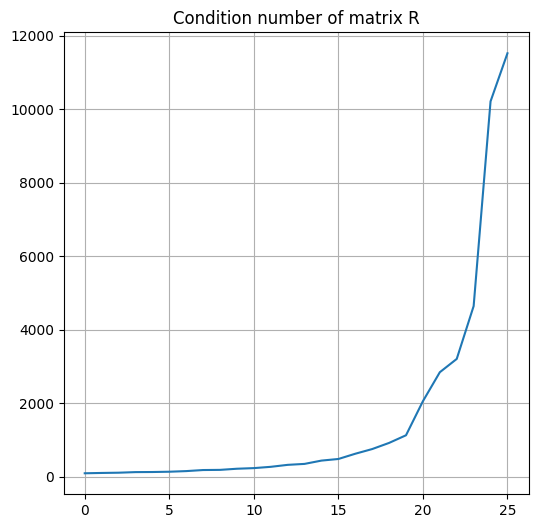

In [ ]:
condition_number_21 = np.zeros((N, 1))
for i in range(N):
    condition_number_21[i] = np.linalg.cond(R[i])

fig = plt.figure(figsize=(6,6))
plt.title('Condition number of matrix R')
plt.plot(condition_number_21)
plt.grid()

Well, when values of sigma has doubled, cond number of R constantly growing and growing dramatically after 23 steps.

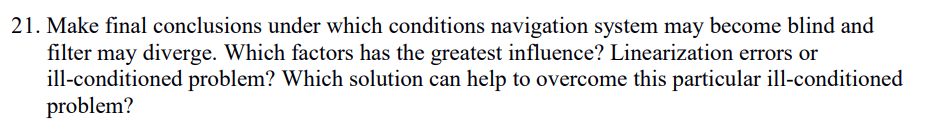

The navigation system can go blind when the object is too close to the observer.

[]

In this case, the condition number of the matrix R is high, so the matrix R is ill-conditioned, and the filter diverges.

[]

So the main factor in this is a ill-conditioned problem.

[]

One way to solve this problem is to use a second observer.

[]

2 observers will not have to be close to each other to estimate the coordinates of the object.

[]


Example: Navigation satellites

**Conclusions**: That was really challenging task this time, a lot of new formula and whole different coordination system, so we had to learn all day and night long to figure out what is wrong with our functions and how to use a defibrillator to revive them. During this assignment we remembered that using polar coordinates in general leads to errors in estimations, but can be very useful for some specific tasks. And for sure there were a few very representative tasks for understanding that starting points matters.